In [1]:
#Import libraries
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

## Data reading and wrangling

In [2]:
#set directory for results
res = 'run_v1/csv_results/'

In [3]:
#read parquet file with aggregated results
df = pd.read_parquet(res + 'all.parquet')

In [19]:
#create new columns

df['route_id'] = df['source'].str.split('_').str[1]
df['route_id'] = df['source'].str.split('_').str[1]
df['time_day'] = df['source'].str.split('_').str[2]
df['type'] = df['source'].str.split('_').str[3]
df

,value,distance,amount,s_exp,source,route_id,time_day,type
0,100.0,1905.6,34.80,78.500940,route_26_evening_shortest,26,evening,shortest
1,98.0,583.6,10.66,78.500940,route_26_evening_shortest,26,evening,shortest
2,99.0,412.5,7.53,78.500940,route_26_evening_shortest,26,evening,shortest
3,10.0,316.1,5.77,78.500940,route_26_evening_shortest,26,evening,shortest
4,78.0,280.8,5.13,78.500940,route_26_evening_shortest,26,evening,shortest
...,...,...,...,...,...,...,...,...
12,89.0,48.2,0.64,28.051924,route_9_noon_recommended,9,noon,recommended
13,95.0,23.6,0.31,28.051924,route_9_noon_recommended,9,noon,recommended
14,70.0,20.3,0.27,28.051924,route_9_noon_recommended,9,noon,recommended
15,34.0,11.8,0.16,28.051924,route_9_noon_recommended,9,noon,recommended


In [6]:
#create dataset with aggregated distance
dfw = df.groupby('source')['distance'].sum()

dfw = dfw.to_frame().reset_index()



In [7]:
#create dataframe with relevant variables

df_exp = df[['source', 's_exp', 'time_day']]
df_exp = df_exp.drop_duplicates()

In [9]:
#merge dataframe
df_merged = dfw.merge(df_exp[['source', 's_exp', 'time_day']], on='source', how='inner')

df_merged['route_type'] = df_merged['source'].str.split('_').str[3]

df_merged

,source,distance,s_exp,time_day,route_type
0,route_0_afternoon_recommended,9428.4,42.863169,afternoon,recommended
1,route_0_afternoon_shortest,8968.3,43.237247,afternoon,shortest
2,route_0_evening_recommended,9509.0,31.369408,evening,recommended
3,route_0_evening_shortest,9004.7,34.267982,evening,shortest
4,route_0_morning_recommended,9355.5,37.661867,morning,recommended
...,...,...,...,...,...
315,route_9_evening_shortest,7490.4,17.154037,evening,shortest
316,route_9_morning_recommended,8576.0,9.043925,morning,recommended
317,route_9_morning_shortest,8506.3,8.894114,morning,shortest
318,route_9_noon_recommended,7553.3,28.051924,noon,recommended


## Length and solar exposure distribution

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

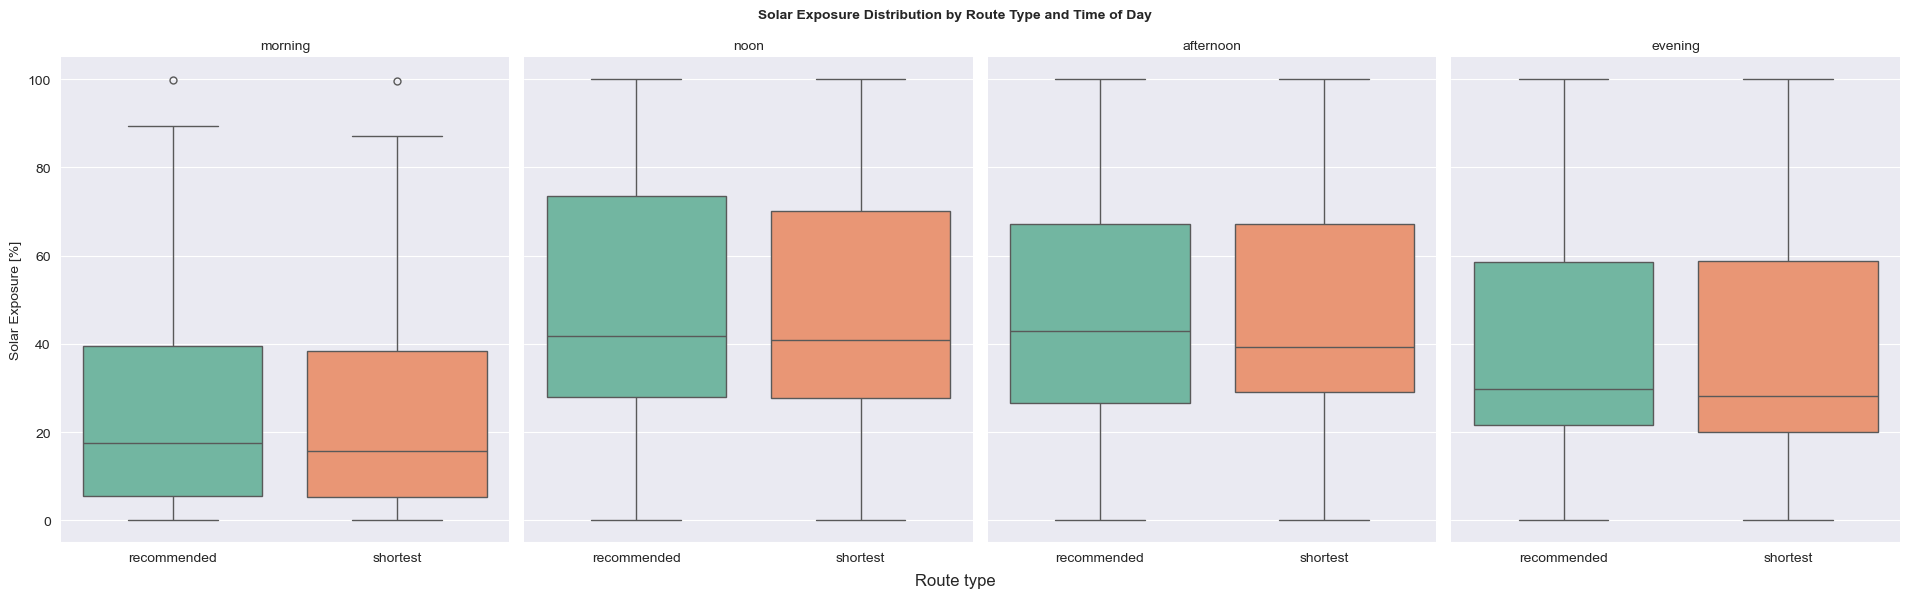

In [11]:
#first plot
palette = sns.color_palette("Set2", 2)

p = sns.catplot(
    kind='box',
    data=df_merged,
    x='route_type',
    y='s_exp',
    hue='route_type',
    legend=False,
    col='time_day',
    col_wrap=4,
    height=6,
    aspect=0.8,
    palette=palette,
    col_order=['morning', 'noon', 'afternoon', 'evening']
)


p.set_titles("{col_name}")
p.set_axis_labels("", "Solar Exposure [%]")
p.despine(left=True)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle("Solar Exposure Distribution by Route Type and Time of Day", fontsize=10, fontweight='bold')


p.fig.text(0.5, 0.02, "Route type", ha='center', fontsize=12)

p.savefig("s_exp_route_type_timeofday.png", dpi=400, bbox_inches='tight')

plt.show()

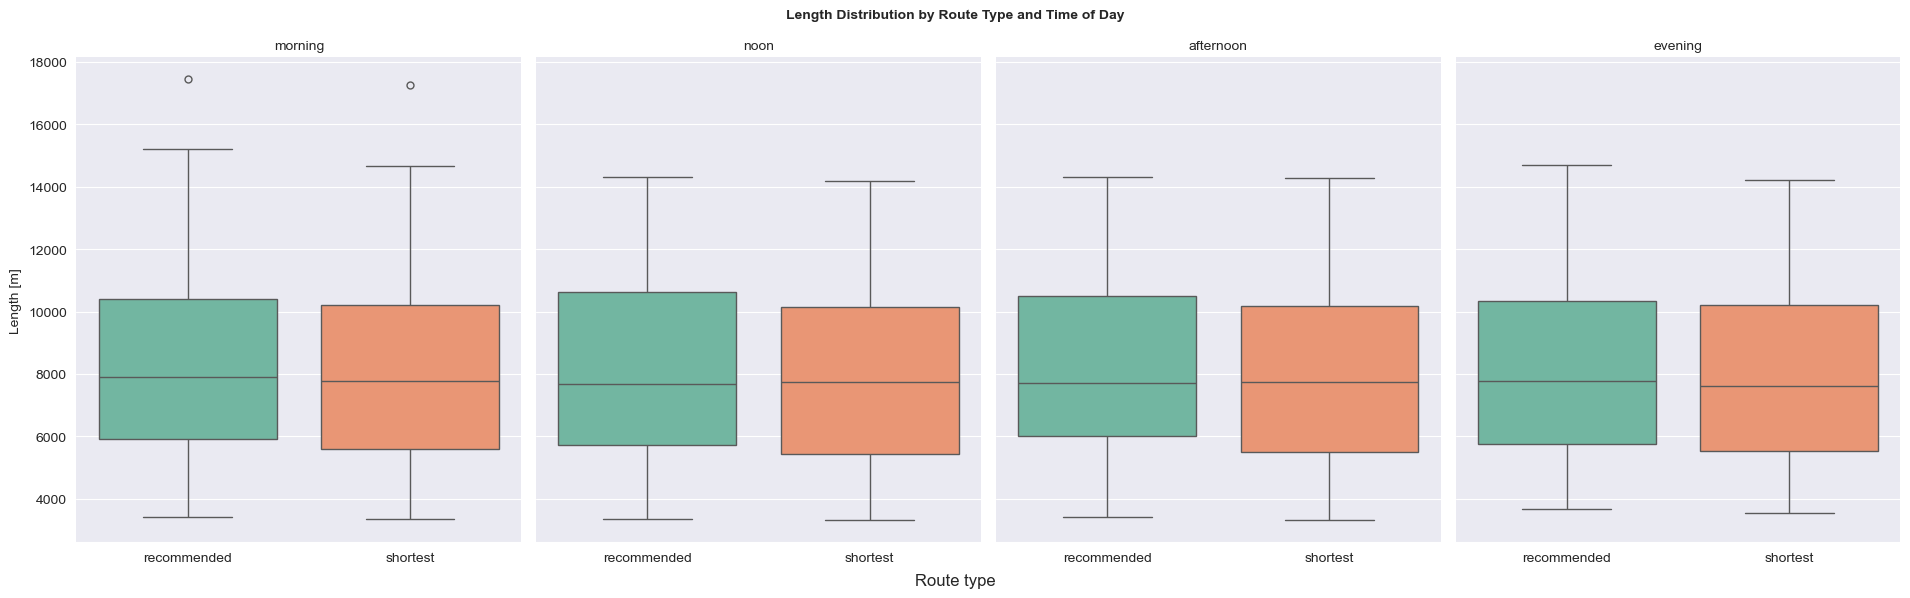

In [12]:
#second plot

palette = sns.color_palette("Set2", 2)

p = sns.catplot(
    kind='box',
    data=df_merged,
    x='route_type',
    y='distance',
    hue='route_type',
    legend=False,
    col='time_day',
    col_wrap=4,
    height=6,
    aspect=0.8,
    palette=palette,
    col_order=['morning', 'noon', 'afternoon', 'evening']
)


p.set_titles("{col_name}")
p.set_axis_labels("", "Length [m]")
p.despine(left=True)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle("Length Distribution by Route Type and Time of Day", fontsize=10, fontweight='bold')


p.fig.text(0.5, 0.02, "Route type", ha='center', fontsize=12)

p.savefig("length_route_type_timeofday.png", dpi=400, bbox_inches='tight')

plt.show()

## Find biggest length difference

In [13]:
df_merged['source_no_route'] = df_merged['source'].str.rsplit('_', n=1).str[0]
df_merged

,source,distance,s_exp,time_day,route_type,source_no_route
0,route_0_afternoon_recommended,9428.4,42.863169,afternoon,recommended,route_0_afternoon
1,route_0_afternoon_shortest,8968.3,43.237247,afternoon,shortest,route_0_afternoon
2,route_0_evening_recommended,9509.0,31.369408,evening,recommended,route_0_evening
3,route_0_evening_shortest,9004.7,34.267982,evening,shortest,route_0_evening
4,route_0_morning_recommended,9355.5,37.661867,morning,recommended,route_0_morning
...,...,...,...,...,...,...
315,route_9_evening_shortest,7490.4,17.154037,evening,shortest,route_9_evening
316,route_9_morning_recommended,8576.0,9.043925,morning,recommended,route_9_morning
317,route_9_morning_shortest,8506.3,8.894114,morning,shortest,route_9_morning
318,route_9_noon_recommended,7553.3,28.051924,noon,recommended,route_9_noon


In [14]:
wide_df = df_merged.pivot(
    index='source_no_route',
    columns='route_type',
    values='distance'
)

In [15]:
wide_df['Score_diff'] = wide_df['recommended'] - wide_df['shortest']
wide_df

route_type,recommended,shortest,Score_diff
source_no_route,,,
route_0_afternoon,9428.4,8968.3,460.1
route_0_evening,9509.0,9004.7,504.3
route_0_morning,9355.5,9115.5,240.0
route_0_noon,9028.7,8976.0,52.7
route_10_afternoon,4008.2,4016.0,-7.8
...,...,...,...
route_8_noon,6581.1,6573.3,7.8
route_9_afternoon,7553.3,7490.4,62.9
route_9_evening,7603.3,7490.4,112.9


In [16]:
big_diff = (wide_df['recommended'] - wide_df['shortest']).abs().idxmax()
big_diff

'route_16_morning'

In [54]:
#plot with folium
gdf1 = gpd.read_file(f'../data/run_v1/01_raw/01_routes/{big_diff}_recommended.geojson')
gdf2= gpd.read_file(f'../data/run_v1/01_raw/01_routes/{big_diff}_shortest.geojson')

df1 = df_merged[df_merged['source'] == f'{big_diff}_recommended']
df2 = df_merged[df_merged['source'] == f'{big_diff}_shortest']

gdf1['solar_exp'] = df1.iloc[0]['s_exp']
gdf1['source'] = df1.iloc[0]['source']
gdf2['solar_exp'] = df2.iloc[0]['s_exp']
gdf2['source'] = df2.iloc[0]['source']


gdf_combined = pd.concat([gdf1, gdf2], ignore_index=True)

gdf_combined


Skipping field way_points: unsupported OGR type: 1
Skipping field way_points: unsupported OGR type: 1


,ascent,descent,extras,summary,geometry,solar_exp,source
0,632.5,508.0,"{ ""csv"": { ""values"": [ [ 0, 7, 100 ], [ 7, 12,...","{ ""distance"": 9677.0, ""duration"": 6967.3999999...","LINESTRING Z (8.75573 49.43018 320, 8.75533 49...",39.405318,route_16_morning_recommended
1,690.5,566.0,"{ ""csv"": { ""values"": [ [ 0, 7, 100 ], [ 7, 12,...","{ ""distance"": 8062.0, ""duration"": 5804.6000000...","LINESTRING Z (8.75573 49.43018 320, 8.75533 49...",61.028392,route_16_morning_shortest


In [86]:
gdf_combined['source'].unique()

array(['route_16_morning_recommended', 'route_16_morning_shortest'],
      dtype=object)

In [22]:
import folium
import branca

m = folium.Map([49.4, 8.7], zoom_start=10, tiles='cartodbpositron')

min_val = gdf_combined['solar_exp'].min()
max_val = gdf_combined['solar_exp'].max()
colormap = branca.colormap.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],
    vmin=min_val,
    vmax=max_val,
    caption='Solar Exposure'
)



for source in gdf_combined['source'].unique():
    fg = folium.FeatureGroup(name=f"Route: {source}")
    
    geojson = folium.GeoJson(
        gdf_combined[gdf_combined['source'] == source],
        style_function=lambda feature, cmap=colormap: {
            'color': cmap(feature['properties']['solar_exp']),
            'weight': 3,
            'opacity': 1
        }
    )
    
    geojson.add_to(fg)
    fg.add_to(m)

folium.LayerControl().add_to(m)

colormap.add_to(m)

m


## Find biggest Solar exposure difference

In [55]:
wide_df = df_merged.pivot(
    index='source_no_route',
    columns='route_type',
    values='s_exp'
)

In [56]:
big_diff = (wide_df['recommended'] - wide_df['shortest']).abs().idxmax()
big_diff

'route_11_morning'

In [57]:
gdf1 = gpd.read_file(f'../data/run_v1/01_raw/01_routes/{big_diff}_recommended.geojson')
gdf2= gpd.read_file(f'../data/run_v1/01_raw/01_routes/{big_diff}_shortest.geojson')

df1 = df_merged[df_merged['source'] == f'{big_diff}_recommended']
df2 = df_merged[df_merged['source'] == f'{big_diff}_shortest']

gdf1['solar_exp'] = df1.iloc[0]['s_exp']
gdf1['source'] = df1.iloc[0]['source']
gdf2['solar_exp'] = df2.iloc[0]['s_exp']
gdf2['source'] = df2.iloc[0]['source']


gdf_combined = pd.concat([gdf1, gdf2], ignore_index=True)

gdf_combined

Skipping field way_points: unsupported OGR type: 1
Skipping field way_points: unsupported OGR type: 1


,ascent,descent,extras,summary,geometry,solar_exp,source
0,491.5,248.0,"{ ""csv"": { ""values"": [ [ 0, 40, 0 ], [ 40, 42,...","{ ""distance"": 10034.799999999999, ""duration"": ...","LINESTRING Z (8.65642 49.35713 104, 8.65749 49...",39.679353,route_11_morning_recommended
1,430.5,187.0,"{ ""csv"": { ""values"": [ [ 0, 64, 0 ], [ 64, 65,...","{ ""distance"": 11238.1, ""duration"": 8091.399999...","LINESTRING Z (8.65642 49.35713 104, 8.65531 49...",11.567382,route_11_morning_shortest


In [24]:
import folium
import branca

m = folium.Map([49.4, 8.7], zoom_start=12, tiles='cartodbpositron')

min_val = gdf_combined['solar_exp'].min()
max_val = gdf_combined['solar_exp'].max()
colormap = branca.colormap.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],
    vmin=min_val,
    vmax=max_val,
    caption='Solar Exposure'
)



for source in gdf_combined['source'].unique():
    fg = folium.FeatureGroup(name=f"Route: {source}")

    geojson = folium.GeoJson(
        gdf_combined[gdf_combined['source'] == source],
        style_function=lambda feature, cmap=colormap: {
            'color': cmap(feature['properties']['solar_exp']),
            'weight': 3,
            'opacity': 1
        }
    )

    geojson.add_to(fg)
    fg.add_to(m)

folium.LayerControl().add_to(m)

colormap.add_to(m)

m

## Correlation Matrix


In [26]:
df_merged

,source,distance,s_exp,time_day,route_type,source_no_route
0,route_0_afternoon_recommended,9428.4,42.863169,afternoon,recommended,route_0_afternoon
1,route_0_afternoon_shortest,8968.3,43.237247,afternoon,shortest,route_0_afternoon
2,route_0_evening_recommended,9509.0,31.369408,evening,recommended,route_0_evening
3,route_0_evening_shortest,9004.7,34.267982,evening,shortest,route_0_evening
4,route_0_morning_recommended,9355.5,37.661867,morning,recommended,route_0_morning
...,...,...,...,...,...,...
315,route_9_evening_shortest,7490.4,17.154037,evening,shortest,route_9_evening
316,route_9_morning_recommended,8576.0,9.043925,morning,recommended,route_9_morning
317,route_9_morning_shortest,8506.3,8.894114,morning,shortest,route_9_morning
318,route_9_noon_recommended,7553.3,28.051924,noon,recommended,route_9_noon


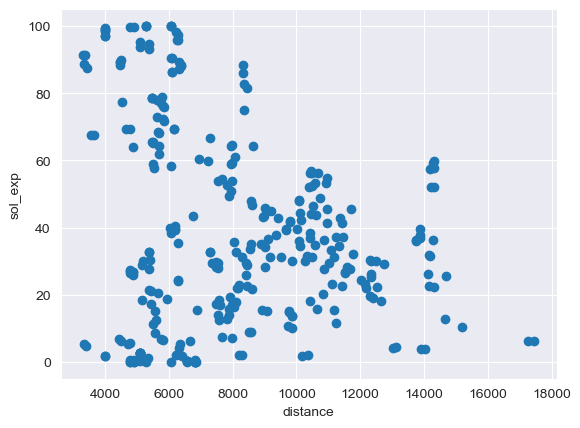

In [50]:
distance = df_merged["distance"]
sol_exp = df_merged["s_exp"]

plt.plot(distance, sol_exp, "o")
plt.xlabel("distance")
plt.ylabel("sol_exp")
plt.show()

In [53]:
x = distance.copy()
y = sol_exp.copy()
x_bar = np.mean(distance)
y_bar = np.mean(sol_exp)

np.sum((x - x_bar) * (y - y_bar)) / (
    np.sqrt(np.sum((x - x_bar) ** 2)) * np.sqrt(sum((y - y_bar) ** 2))
)


(
    np.cov(x, y) / (np.std(x) * np.std(y))
)



print(np.corrcoef(x, y)[0, 1])


-0.2399471268571638
